## Captura y Almacenamiento de Datos - Trabajo 2
# Preprocesamiento Set de Datos IPSA v/s Noticias

8 de Octubre de 2021

### Integrantes:
- Mauricio Bustos
- Marco Cid
- Oscar Jara
- Leonardo Parra

Se prepara un set de datos en formato JSON para un posterior estudio sobre la sensibilidad de valores de cierre del IPSA y análisis textual derivado de noticias publicadas sobre Chile.

In [1]:
# Importación de librerías

import pandas as pd
from newsapi import NewsApiClient
from pprint import pprint
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

## Importación de Datos

### Importación de Noticias

In [ ]:
# Inicialización para newsAPI

APIkey = 'XXXXXXXXXXXXXXXXXXXXXX' #Get your own API Key in https://newsapi.org/

newsapi = NewsApiClient(api_key=APIkey)

In [ ]:
# Función de llamada de API, según palabra clave y fechas de inicio y término

def news_function(key_word, fecha_inicio, fecha_termino):    

    news = []
 

    # En las llamadas se incluye "Chile" para acotar las respuestas de la API ya que en los filtros por país
    # no está disponible Chile.
    
    articles = newsapi.get_everything(q=f'{key_word} Chile',
                                    from_param=fecha_inicio,
                                    to=fecha_termino,
                                    language='es')
    
    total_results = articles['totalResults']

    if total_results >= 100:
        last_page = 5
    else:
        last_page = int(total_results / 20)

    for i in range(1, last_page+1):
        articles = newsapi.get_everything(q=f'{key_word} Chile',
                                    from_param=fecha_inicio,
                                    to=fecha_termino,
                                    language='es',
                                    page=i)

        for article in articles['articles']:
            news.append([article['publishedAt'], article['author'], article['content'], article['source']['name']])

    # Generación de dataframes

    df = pd.DataFrame(news, columns=['fecha_publicacion', 'autor', 'contenido', 'fuente'])

    df['key_word_1'] = key_word
    df['key_word_2'] = 'Chile'

    return df

In [ ]:
# Definición de fechas para cumplir con restricción de API de consulta de máximo 30 días de antiguedad

fecha_termino = datetime.today().date()
fecha_inicio = fecha_termino - relativedelta(days=30)
print('Inicio:', fecha_inicio)
print('Término:', fecha_termino)

In [ ]:
# LLamadas a API con diversas palabras claves relacionadas a estado anímico de incertidumbre

crisis_news = news_function('crisis', fecha_inicio, fecha_termino)
protestas_news = news_function('protestas', fecha_inicio, fecha_termino)
cuarentena_news = news_function('cuarentena', fecha_inicio, fecha_termino)
demandas_news = news_function('demandas', fecha_inicio, fecha_termino)
presidente_news = news_function('presidente', fecha_inicio, fecha_termino)
gobierno_news = news_function('gobierno', fecha_inicio, fecha_termino)
incertidumbre_news = news_function('incertidumbre', fecha_inicio, fecha_termino)
pandemia_news = news_function('pandemia', fecha_inicio, fecha_termino)
elecciones_news = news_function('elecciones', fecha_inicio, fecha_termino)
congreso_news = news_function('congreso', fecha_inicio, fecha_termino)
constitucion_news = news_function('constitución', fecha_inicio, fecha_termino)
advertencia_news = news_function('advertencia', fecha_inicio, fecha_termino)
caida_news = news_function('caída', fecha_inicio, fecha_termino)

In [ ]:
# Unión de los dataframes con información recibida desde API

df_news = pd.concat([crisis_news, protestas_news, cuarentena_news, demandas_news, presidente_news, gobierno_news, incertidumbre_news, pandemia_news, elecciones_news, congreso_news, constitucion_news, advertencia_news, caida_news])

In [ ]:
# Código auxiliar: Exportación de dataset noticias

df_news.to_excel('df_news.xlsx')

In [2]:
# Código auxiliar: Importación de dataset noticias

df_news = pd.read_excel('df_news.xlsx')

In [3]:
# Visualización de registros aleatorios del dataframe

df_news.sample(5)

,Unnamed: 0,fecha_publicacion,autor,contenido,fuente,key_word_1,key_word_2
335,35,2021-09-24T14:09:28Z,El Mostrador Mercados,"""Si nosotros seguimos con este nivel de gasto ...",Elmostrador.cl,demandas,Chile
362,62,2021-09-14T01:02:54Z,Egon Montecinos,"Hasta la elección presidencial del año 2017, l...",Elmostrador.cl,demandas,Chile
1128,28,2021-09-07T17:00:07Z,(abc),Marta Benayas ÁlamosSEGUIR\r\nActualizado:07/0...,Www.abc.es,caída,Chile
307,7,2021-09-15T00:30:38Z,Agenda País,La pandemia del coronavirus dio aún mayor prot...,Elmostrador.cl,demandas,Chile
657,77,2021-09-26T01:02:39Z,Diego Rojo Martel,"Iquique, puerto ubicado en el borde occidental...",Elmostrador.cl,incertidumbre,Chile


In [4]:
# Visualización de dimensiones del dataframe

df_news.shape

(1200, 7)

### Importación de IPSA

In [5]:
# Importación de archivo Excel bajado desde sitio del Banco Central de Chile con info de todo el 2021

df_ipsa = pd.read_excel('Canasta_07102021121622.xlsx')
df_ipsa.drop(df_ipsa.index[:3], inplace=True)  # Elimina las primeras 3 filas ya que no corresponden a registros
df_ipsa.columns = ['fecha', 'valor_ipsa']  # Renombra las columnas
df_ipsa['fecha'] = pd.to_datetime(df_ipsa.fecha, format='%Y-%m-%d')  # Mantiene solo la fecha sin mostrar la hora

# Reseteo del index

df_ipsa.reset_index(inplace=True)
del df_ipsa['index']

# Visualización de los primeros registros del df

df_ipsa.head()

,fecha,valor_ipsa
0,2021-01-04,4257.44
1,2021-01-05,4367.18
2,2021-01-06,4417.84
3,2021-01-07,4528.85
4,2021-01-08,4560.02


## Limpieza de Datos

### Missing values en Noticias

In [6]:
# Eliminación de artículos duplicados

df_news.drop_duplicates(subset='contenido', inplace=True)

# Verificación de dimensiones del df sin duplicados

df_news.shape

(839, 7)

In [7]:
# Búsqueda de missing values

df_news.isnull().sum()

Unnamed: 0            0
fecha_publicacion     0
autor                94
contenido             1
fuente                0
key_word_1            0
key_word_2            0
dtype: int64

Se observa un missing value en la columna "contenido" que será eliminado.

In [8]:
# Eliminación de NaN

df_news.dropna(subset=['contenido'], inplace=True)

# Verificación de dimensiones del df sin NaN

df_news.shape

(838, 7)

In [9]:
# Exploración de top 15 fuentes de noticias

df_news['fuente'].value_counts().head(15)

Elmostrador.cl           212
Theclinic.cl             165
La Nacion                100
RT                        36
Sputnik International     24
CNN                       23
BBC News                  21
Jornada.com.mx            20
Www.abc.es                19
As.com                    17
DW (English)              16
Excelsior.com.mx          14
El Mundo                  12
Publico.es                 9
20minutos.es               9
Name: fuente, dtype: int64

Se observa que fuente DW tiene indicación "English". Verificaremos que sus noticias vengan en español

In [10]:
# Visualización de noticias de DW

df_news[df_news['fuente'] == 'DW (English)']

,Unnamed: 0,fecha_publicacion,autor,contenido,fuente,key_word_1,key_word_2
146,46,2021-10-03T00:11:00Z,Deutsche Welle (www.dw.com),El exmandatario de EE. UU. Donald Trump pidió ...,DW (English),protestas,Chile
148,48,2021-09-18T12:05:00Z,Deutsche Welle (www.dw.com),Duros enfrentamientos se registraron este sába...,DW (English),protestas,Chile
186,86,2021-09-09T13:01:00Z,Deutsche Welle (www.dw.com),Hora de Europa Central\r\n15:00 | EMA: tercera...,DW (English),protestas,Chile
187,87,2021-09-23T15:33:00Z,Deutsche Welle (www.dw.com),Argumentando que su país estaba ofreciendo un ...,DW (English),protestas,Chile
191,91,2021-09-18T09:52:00Z,Deutsche Welle (www.dw.com),Los militares golpistas que derrocaron al gobi...,DW (English),protestas,Chile
224,24,2021-09-23T16:19:00Z,Deutsche Welle (www.dw.com),El Consejo de la Unión Europea agregó este jue...,DW (English),cuarentena,Chile
241,41,2021-10-01T15:54:00Z,Deutsche Welle (www.dw.com),Las autoridades británicas anunciaron este vie...,DW (English),cuarentena,Chile
298,98,2021-09-23T15:05:00Z,Deutsche Welle (www.dw.com),La desconfianza contra las vacunas administrad...,DW (English),cuarentena,Chile
360,60,2021-09-29T16:34:00Z,Deutsche Welle (www.dw.com),Marthe Wandou\r\nEsta activista por la paz y l...,DW (English),demandas,Chile
659,79,2021-09-17T03:13:00Z,Deutsche Welle (www.dw.com),Miles de migrantes confluyeron este jueves (16...,DW (English),incertidumbre,Chile


DW ok. Noticias efectivamente están en español

### Missing values en IPSA

In [11]:
# Búsqueda de valores faltantes

df_ipsa.isnull().sum()

fecha          0
valor_ipsa    84
dtype: int64

Hay 84 valores faltantes en IPSA para el año 2021 debido a que no hay valores para los sábados, domingos y festivos

In [12]:
# Imputación de valores en NaN con valores del día hábil anterior al del día faltante (criterio de negocio)

valor_anterior = df_ipsa['valor_ipsa'][0]
for i in range(1, len(df_ipsa)):
    valor_actual = df_ipsa['valor_ipsa'][i]
    if pd.isna(valor_actual):
        df_ipsa['valor_ipsa'][i] = valor_anterior
    valor_anterior = df_ipsa['valor_ipsa'][i]

df_ipsa.head(10)

<ipython-input-12-84c31e6cb703>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipsa['valor_ipsa'][i] = valor_anterior


,fecha,valor_ipsa
0,2021-01-04,4257.44
1,2021-01-05,4367.18
2,2021-01-06,4417.84
3,2021-01-07,4528.85
4,2021-01-08,4560.02
5,2021-01-09,4560.02
6,2021-01-10,4560.02
7,2021-01-11,4552.52
8,2021-01-12,4600.12
9,2021-01-13,4658.71


### Outliers en IPSA

Dado que la variable es una serie de tiempo, se considera elaborar un gráfico de líneas e identificar los outliers visualmente.

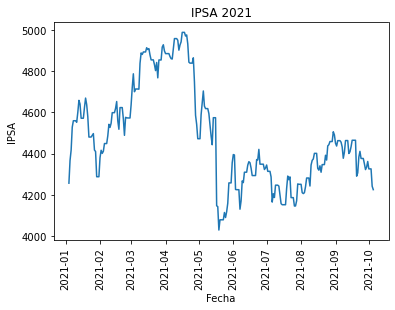

In [13]:
# Visualización de IPSA

plt.plot(df_ipsa['fecha'], df_ipsa['valor_ipsa'])
plt.xlabel('Fecha')
plt.ylabel('IPSA')
plt.title('IPSA 2021')
plt.xticks(rotation=90)
plt.show()

Evolución del IPSA se observa normal en todo el período, no se aprecian outliers

## Transformación

### Agrupación de noticias

In [14]:
# Transformación columna a tipo fecha

df_news['fecha_publicacion'] = pd.to_datetime(df_news['fecha_publicacion']).dt.date

In [15]:
# Creacion de lista con fechas

fechas = sorted(pd.unique(df_news['fecha_publicacion']))

In [16]:
# Agrupación del contenido de las noticias por fecha

contenido_por_fecha = [" "] * len(fechas)  # Lista con espacios por cada fecha presente en df_news

for i in range(len(fechas)):
    for j in range(len(df_news)):
        if fechas[i] == df_news['fecha_publicacion'].iloc[j]:
            contenido_por_fecha[i] = contenido_por_fecha[i] + df_news['contenido'].iloc[j]

In [17]:
# Creación de dataframe con agrupado por fecha

df_agrupado = pd.DataFrame(list(zip(fechas, contenido_por_fecha)), columns =['fecha', 'contenido_noticias']) 

# Revisión de primeros registros del dataframe

df_agrupado.head()

,fecha,contenido_noticias
0,2021-09-07,¿Por qué Chile fue escenario de un descontent...
1,2021-09-08,Los sismos a pesar de ser más o menos comunes...
2,2021-09-09,Es evidente que en la sociedad chilena existe...
3,2021-09-10,El Presidente Sebastián Piñera se comprometió...
4,2021-09-11,<ul><li>Redacción </li><li>Centroamérica Cuen...


In [18]:
# Verificación de dimensiones del df

df_agrupado.shape

(31, 2)

### Unión de los sets de datos

In [19]:
# Transformación columna fecha df agrupado a datetime

df_agrupado['fecha'] = pd.to_datetime(df_agrupado['fecha'])

In [20]:
# Unión de ambos df

df_consolidado = df_agrupado.merge(df_ipsa, on='fecha')  # Fechas de noticias prevalecen sobre las del IPSA, por lo
                                                         # que se seleccionan los útimos 30 días de IPSA.

# Selección de columnas

df_consolidado = df_consolidado[['fecha', 'contenido_noticias', 'valor_ipsa']]

# Vista dataframe

df_consolidado

,fecha,contenido_noticias,valor_ipsa
0,2021-09-07,¿Por qué Chile fue escenario de un descontent...,4432.98
1,2021-09-08,Los sismos a pesar de ser más o menos comunes...,4378.14
2,2021-09-09,Es evidente que en la sociedad chilena existe...,4407.24
3,2021-09-10,El Presidente Sebastián Piñera se comprometió...,4464
4,2021-09-11,<ul><li>Redacción </li><li>Centroamérica Cuen...,4464
5,2021-09-12,"Desde que reconoció su mentira el Pelao Vade,...",4464
6,2021-09-13,La confianza en la Convención Constitucional ...,4401.31
7,2021-09-14,Las autoridades sanitarias de Chile reportaro...,4409.42
8,2021-09-15,"Primero, una PSU que sufrió\r\nuna serie de a...",4433.84
9,2021-09-16,El retiro del kit está programado a las 16:00...,4465.47


### Expresiones regulares para formato, números, puntuación y símbolos

Transformación de minúsculas, vocales con tilde, cambio de ñ por nh y eliminación de números y de caracteres especiales.

Se crea una nueva columna con la limpieza realizada, manteniendo data original de respaldo.

In [21]:
# Uso de expresiones regulares para transformaciones

df_consolidado['clean_contenido'] = df_consolidado['contenido_noticias'].str.lower().str.replace('ñ','nh').str.replace('á','a').str.replace('é','e').str.replace('í','i').str.replace('ó','o').str.replace('ú','u').str.replace(r'\d+', ' ', regex = True).str.replace(r'[^a-zA-Z\s]', ' ', regex = True)
print(df_consolidado['clean_contenido'].head())

0      por que chile fue escenario de un descontent...
1     los sismos a pesar de ser mas o menos comunes...
2     es evidente que en la sociedad chilena existe...
3     el presidente sebastian pinhera se comprometi...
4      ul  li redaccion   li  li centroamerica cuen...
Name: clean_contenido, dtype: object


## Tokenización

In [22]:
#Importación de librerías

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mauriciobustos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mauriciobustos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# Tokenización

df_consolidado['contenido_tokens'] = df_consolidado['clean_contenido'].apply(nltk.word_tokenize)

# Revisión de tokens

print(df_consolidado['contenido_tokens'].head())

0    [por, que, chile, fue, escenario, de, un, desc...
1    [los, sismos, a, pesar, de, ser, mas, o, menos...
2    [es, evidente, que, en, la, sociedad, chilena,...
3    [el, presidente, sebastian, pinhera, se, compr...
4    [ul, li, redaccion, li, li, centroamerica, cue...
Name: contenido_tokens, dtype: object


### Procesamiento de stopwords

In [24]:
# Definición de stopword en español y revisión

stop_words = set(stopwords.words('spanish'))

print('Tipo Objeto', type(stop_words))

print(stop_words)

Tipo Objeto <class 'set'>
{'estará', 'hubieran', 'estuvimos', 'fuerais', 'tienes', 'mis', 'habríamos', 'la', 'todos', 'estés', 'fue', 'sea', 'habré', 'sentido', 'tengan', 'contra', 'el', 'sí', 'ella', 'habremos', 'míos', 'eras', 'habrían', 'he', 'tuvieran', 'estuvieran', 'tenemos', 'donde', 'estemos', 'estuve', 'serías', 'ante', 'era', 'ti', 'sentidos', 'erais', 'habríais', 'estarán', 'seáis', 'serán', 'cual', 'fuesen', 'tuviste', 'fui', 'uno', 'mía', 'fueras', 'serás', 'seríamos', 'haya', 'tuvo', 'mías', 'hayan', 'fueses', 'tened', 'otras', 'tienen', 'estabas', 'habrán', 'al', 'estas', 'seas', 'tuviesen', 'teníamos', 'han', 'esto', 'estarías', 'tendremos', 'siente', 'tuya', 'eres', 'e', 'tenido', 'tengamos', 'habrá', 'tuviese', 'tengas', 'nuestros', 'nuestra', 'estuvierais', 'muy', 'habiendo', 'nuestras', 'tenidas', 'vosotras', 'estuvieron', 'suyas', 'ellos', 'estuviera', 'estuviese', 'a', 'tuvierais', 'que', 'hubimos', 'eso', 'estad', 'habías', 'tendrían', 'nuestro', 'en', 'vosotros'

Dado que en la captura de datos para noticias habíamos agregado la palabara clave "Chile", ahora la eliminamos para que no distorsione los resultados

In [25]:
# Se agrega palabra "chile" al set de stopwords para su posterior eliminación del dataset

stop_words.add('chile')

Como resultado de iteración previa, se identificó en etapa Word Representation la alta presencia de palabras "chars" y "li", por lo que las agregamos al set de stopwords en esta etapa.

In [26]:
# Se agregan palabras "chars" y "li" al set de stopwords para su posterior eliminación del dataset

stop_words.add('chars')
stop_words.add('li')

In [27]:
# Eliminación de stopwords en español

df_consolidado['contenido_tokens_no_stopwords'] = df_consolidado['contenido_tokens'].apply(lambda contenido: [token for token in contenido if token not in stop_words])

# Revisión de cambios

df_consolidado['contenido_tokens_no_stopwords'].head()

0    [escenario, descontento, social, cnn, espanhol...
1    [sismos, pesar, ser, mas, menos, comunes, much...
2    [evidente, sociedad, chilena, existe, crisis, ...
3    [presidente, sebastian, pinhera, comprometio, ...
4    [ul, redaccion, centroamerica, cuenta, bbcmund...
Name: contenido_tokens_no_stopwords, dtype: object

## Stemming

Stemming para reducir palabras a su raíz gramatical (no se utiliza Lemmatization por tratarse de un set de datos en español)

In [28]:
# Importar librerías

from nltk.stem import SnowballStemmer

In [29]:
# Stemming 

spanish_stemmer = SnowballStemmer('spanish')

df_consolidado['contenido_stem_tokens'] = df_consolidado['contenido_tokens_no_stopwords'].apply(lambda tokens: [spanish_stemmer.stem(t) for t in tokens])

# Revisión del stemming

df_consolidado['contenido_stem_tokens'].head()

0    [escenari, descontent, social, cnn, espanhol, ...
1    [sism, pes, ser, mas, men, comun, much, region...
2    [evident, socied, chilen, exist, crisis, confi...
3    [president, sebasti, pinher, comprometi, viern...
4    [ul, redaccion, centroamer, cuent, bbcmund, ul...
Name: contenido_stem_tokens, dtype: object

## Word Representation

In [30]:
# Importación de librería

from wordcloud import WordCloud

No se utiliza variable stemming debido a que la transformación genera pérdida de entendimiento de la palabra original

In [31]:
# Concatenación de texto

text_all = ' '.join(df_consolidado['contenido_tokens_no_stopwords'].str.join(" "))

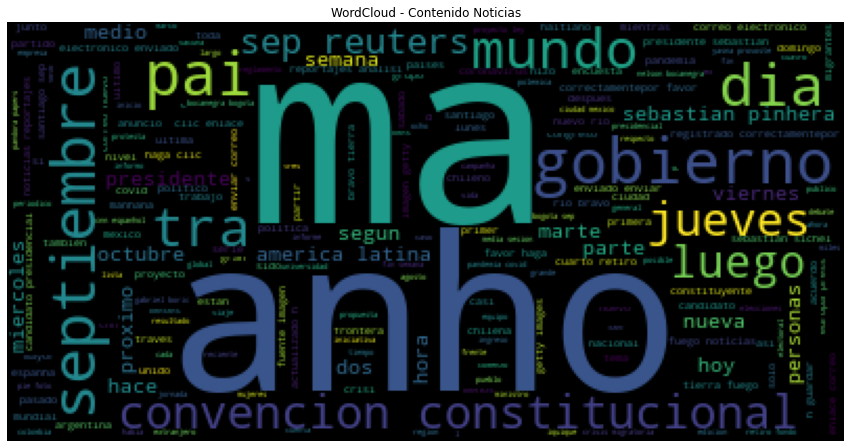

In [32]:
# Generación de word cloud 

wordcloud = WordCloud().generate_from_text(text=text_all)
plt.figure(figsize=(15, 20))
plt.axis("off")
plt.title('WordCloud - Contenido Noticias')
plt.imshow(wordcloud)
plt.show()

### Análisis de Frecuencia

In [33]:
#Importación de librerías

from nltk.probability import FreqDist

In [34]:
# Cálculo de frecuencia de tokens

word_freq_all = FreqDist(word for word in word_tokenize(text_all))

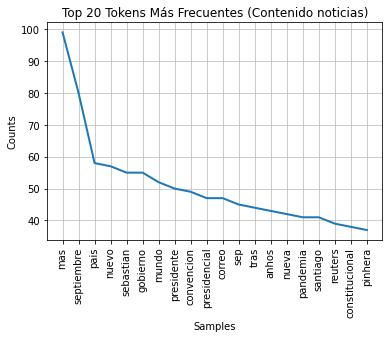

In [35]:
# Grafico del top N Tokens más frecuentes

n = 20
word_freq_all.plot(n, title = f'Top {n} Tokens Más Frecuentes (Contenido noticias)') 

Se observan algunas diferencias entre las palabras con mayor frecuencia mostradas por el world cloud y las mostradas por el gráfico de frecuencias. Se asume que el gráfico es más preciso.

### Análisis de Longitud de Texto

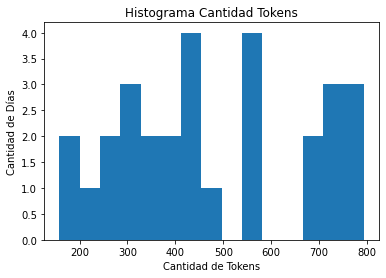

In [36]:
# Histograma cantidad Tokens (Contenido)

plt.hist(df_consolidado['contenido_tokens_no_stopwords'].str.len(), bins=15)
plt.title('Histograma Cantidad Tokens')
plt.xlabel('Cantidad de Tokens')
plt.ylabel('Cantidad de Días')
plt.show()

## Exportación de dataset en formato JSON

In [37]:
import json

In [38]:
# Exportación de dataset en formato JSON

df_consolidado.to_json('IPSA_noticias.json', orient='records')

In [39]:
# Visualización del dataset en JSON exportado

with open('IPSA_noticias.json', 'r') as jsonfile:
    json_data = json.loads(jsonfile.read())
    for element in json_data:
        pprint(element)

{'clean_contenido': '  por que chile fue escenario de un descontento '
                    'social     \r\n'
                    ' cnn espanhol     el nombre de rodrigo rojas vade  de   '
                    'anhos  comenzo a hacerse conocido en las revueltas de '
                    'chile de octubre de    su       chars don felipe expresa '
                    'a pinhera su intencion de retomar el viaje cancelado a '
                    'dicho pais por la pandemia\r\n'
                    ' madrid     europa press \r\n'
                    ' el rey felipe vi ha ensalzado este martes la  madurez '
                    'democratica  dem      chars abc   ep\r\n'
                    'actualizado      \xa0   h\r\n'
                    'guardar\r\n'
                    ' el \r\n'
                    ' encuentro de esta manhana de felipe vi con el presidente '
                    'de la republica de chile  sebastian pinhera  se ha '
                    'completado a mediodia con un almuerz  

                      'al',
                      'cole',
                      'tambien',
                      'hemos',
                      'tenido',
                      'el',
                      'retorno',
                      'de',
                      'la',
                      'agenda',
                      'real',
                      'con',
                      'sus',
                      'diferentes',
                      'citas',
                      'asi',
                      'tras',
                      'ver',
                      'a',
                      'donha',
                      'letizia',
                      'ayer',
                      'en',
                      'la',
                      'entrega',
                      'de',
                      'los',
                      'galardones',
                      'de',
                      'la',
                      'i',
                      'edi',
                      'chars',
        

                    'droga  ampliamente conocidos  han intentado asentarse en '
                    'chile e iniciar en el pais produccion local de sustancias '
                    'ilicitas  segun dio a conocer la fiscalia en el\xa0'
                    'informe        chars  por que el choclo delano y carlos '
                    'eugenio lavin hicieron lo que hicieron   por que ponce '
                    'lerou hizo lo que hizo   por que casi nadie se resistio '
                    'en la politica a caer donde cayeron  en todos estos '
                    'c      chars finales del siglo xix e inicios del xx  un '
                    'heterogeneo y paradojico conjunto de pensadores sento la '
                    'genesis del fascismo  que a su vez fue explicada  con '
                    'sintesis potente  en un ensayo sin autoria de      chars '
                    'se ha registrado correctamentepor favor  haga clic en el '
                    'enlace del correo electronico enviado

                      'rafael',
                      'dochao',
                      'moreno',
                      'asumio',
                      'este',
                      'miercoles',
                      'como',
                      'el',
                      'nuevo',
                      'jefe',
                      'de',
                      'la',
                      'delegacion',
                      'de',
                      'la',
                      'union',
                      'europea',
                      'ue',
                      'en',
                      'venezuela',
                      'un',
                      'cargo',
                      'que',
                      'habia',
                      'quedado',
                      'vacante',
                      'desde',
                      'febrero',
                      'de',
                      'este',
                      'anho',
                      'cuando',
                

                                   'visita',
                                   'barranquilla',
                                   'jueves',
                                   'equipo',
                                   'colombi',
                                   'sep',
                                   'reuters',
                                   'seleccion',
                                   'futbol',
                                   'obligada',
                                   'remontar',
                                   'visita',
                                   'bogota',
                                   'jueves',
                                   'equipo',
                                   'colombia',
                                   'fortalecido',
                                   'tras',
                                   'haber',
                                   'obtenido',
                                   'dos',
                                   'punt

                      'parte',
                      'de',
                      'la',
                      'gira',
                      'europea',
                      'd',
                      'chars',
                      'se',
                      'ha',
                      'registrado',
                      'correctamentepor',
                      'favor',
                      'haga',
                      'clic',
                      'en',
                      'el',
                      'enlace',
                      'del',
                      'correo',
                      'electronico',
                      'enviado',
                      'a',
                      'enviar',
                      'el',
                      'correo',
                      'de',
                      'nuevo',
                      'desde',
                      'el',
                      'rio',
                      'bravo',
                      'hasta',
                    

                                   'camisa',
                                   'corbata',
                                   'llama',
                                   'oficina',
                                   'bar',
                                   'notable',
                                   'academia',
                                   'callao',
                                   'corrientes',
                                   'mientras',
                                   'afuera',
                                   'tormenta',
                                   'santa',
                                   'rosa',
                                   'oscurece',
                                   'l',
                                   'miercoles',
                                   'universidad',
                                   'confirmo',
                                   'junior',
                                   'fernandes',
                                   'vue

                      'con',
                      'el',
                      'equipo',
                      'madrilenho',
                      'con',
                      'el',
                      'que',
                      'espera',
                      'debutar',
                      'dentr',
                      'chars',
                      'actualizado',
                      'h',
                      'guardar',
                      'estar',
                      'informado',
                      'sobre',
                      'las',
                      'novedades',
                      'de',
                      'hoy',
                      'es',
                      'esencial',
                      'para',
                      'conocer',
                      'el',
                      'mundo',
                      'que',
                      'nos',
                      'rodea',
                      'pero',
                      'si',
                

                       'otras fe… [+2587 chars]Los clubes tomaron la decisión '
                       'colectiva de no liberar a los jugadores si viajaban a '
                       "países de la 'lista roja' porque luego tendrían que "
                       'hacer cuarentena en Reino Unido\r\n'
                       'Los clubes de la Premier Leag… [+2716 chars]El '
                       'ministro de Salud, Enrique Paris, informó sobre 489 '
                       'casos nuevos de Covid-19 en Chile, con una positividad '
                       'de 0,87% en las últimas 24 horas a nivel nacional, '
                       '"con lo cual completamos una semana co… [+5053 '
                       'chars]Más de 70 municipios se reunieron para analizar '
                       'la realidad nacional en torno a la sequía y para '
                       'confirmar si para los alcaldes de las regiones '
                       'afectadas la declaración de emergencia agrícola es '
              

                      'un',
                      'verdadero',
                      'idolo',
                      'para',
                      'quienes',
                      'bordean',
                      'los',
                      'anhos',
                      'el',
                      'de',
                      'septiembre',
                      'cumplio',
                      'anhos',
                      'y',
                      'las',
                      'redes',
                      'sociales',
                      'se',
                      'inundaron',
                      'de',
                      'saludos',
                      'y',
                      'felicita',
                      'chars',
                      'el',
                      'ministro',
                      'de',
                      'salud',
                      'enrique',
                      'paris',
                      'reporto',
                      'casos',
        

                      'del',
                      'mundo',
                      'ahora',
                      'esta',
                      'protegido',
                      'contra',
                      'enfermedades',
                      'graves',
                      'y',
                      'la',
                      'muerte',
                      'por',
                      'covid',
                      'pero',
                      'a',
                      'algunos',
                      'paises',
                      'les',
                      'es',
                      'chars',
                      'james',
                      'middleton',
                      'en',
                      'los',
                      'premios',
                      'gq',
                      'en',
                      'berlin',
                      'en',
                      'secreto',
                      'y',
                      'en',
                      'la

                           'correctamentepor',
                           'favor',
                           'hag',
                           'clic',
                           'enlac',
                           'corre',
                           'electron',
                           'envi',
                           'envi',
                           'corre',
                           'nuev',
                           'rio',
                           'brav',
                           'tierr',
                           'fueg',
                           'notici',
                           'reportaj',
                           'analisi'],
 'contenido_tokens': ['las',
                      'autoridades',
                      'sanitarias',
                      'de',
                      'chile',
                      'reportaron',
                      'este',
                      'martes',
                      'que',
                      'en',
                      'la

                       'su mandato con altos n… [+2130 chars](CNN Español) -- '
                       'El rapero puertorriqueño Bad Bunny y el presidente de '
                       'El Salvador, Nayib Bukele, fueron algunos de los '
                       'latinos seleccionados en la lista anual de los 100 más '
                       'influyentes de la revist… [+8809 chars]Este miércoles '
                       '15 de septiembre, el Centro de Estudios Públicos (CEP) '
                       'publicó el Estudio Nacional de Opinión Pública Nº85 el '
                       'cual se basa en encuestas realizadas a la '
                       'ciudadanía.\r\n'
                       'Los sondeos fueron … [+1477 chars]Autoridades de la '
                       'Ciudad de México informan que la escultura de '
                       'Cristóbal Colón pasará del Paseo de la Reforma a '
                       'Polanco.\r\n'
                       'El gobierno de la Ciudad de México informó est

                      'encuesta',
                      'del',
                      'centro',
                      'de',
                      'estudios',
                      'publicos',
                      'cep',
                      'dejo',
                      'como',
                      'gran',
                      'ganador',
                      'al',
                      'candidato',
                      'presidencial',
                      'al',
                      'abanderado',
                      'de',
                      'apruebo',
                      'dignidad',
                      'gabriel',
                      'boric',
                      'aunque',
                      'tambien',
                      'encendio',
                      'las',
                      'alar',
                      'chars',
                      'la',
                      'ultima',
                      'edicion',
                      'de',
                      '

                           'presentacion',
                           'indic',
                           'cuatr',
                           'reglament',
                           'aprob',
                           'mart',
                           'pas',
                           'gener',
                           'stellantis',
                           'present',
                           'hoy',
                           'nuev',
                           'c',
                           'crossov',
                           'segment',
                           'cityc',
                           'fabric',
                           'brasil',
                           'fin',
                           'anho',
                           'lleg',
                           'argentin',
                           'comienz',
                           'nuev',
                           'c',
                           'reemplaz',
                           'institut',
            

                                   'bruselas',
                                   'sep',
                                   'europa',
                                   'press',
                                   'parlamento',
                                   'europeo',
                                   'demandado',
                                   'jueves',
                                   'union',
                                   'eur',
                                   'covid',
                                   'ira',
                                   'vacunarnos',
                                   'londres',
                                   'cnn',
                                   'mas',
                                   'meses',
                                   'despues',
                                   'pandemia',
                                   'coronavirus',
                                   'varios',
                                   'paises',
      

                      'por',
                      'chars',
                      'la',
                      'posible',
                      'ratificacion',
                      'del',
                      'quorum',
                      'de',
                      'dos',
                      'tercios',
                      'para',
                      'aprobar',
                      'las',
                      'normas',
                      'de',
                      'la',
                      'nueva',
                      'carta',
                      'magna',
                      'en',
                      'chile',
                      'de',
                      'parte',
                      'de',
                      'la',
                      'convencion',
                      'constitucional',
                      'es',
                      'una',
                      'mala',
                      'noticia',
                      'para',
                 

                       'informe de agosto sobre\r\n'
                       'indicadores energéticos y en ese mes Uruguay tuvo la '
                       'nafta y el ga… [+2304 chars]',
 'contenido_stem_tokens': ['august',
                           'pinochet',
                           'aun',
                           'hombr',
                           'fuert',
                           'falt',
                           'cuatr',
                           'anhos',
                           'termin',
                           'dictadur',
                           'mas',
                           'dej',
                           'pod',
                           'polit',
                           'econom',
                           'social',
                           'tom',
                           'palabr',
                           'inici',
                           'respuest',
                           'column',
                           'ff',
                    

                      'estan',
                      'centradas',
                      'en',
                      'la',
                      'construccion',
                      'de',
                      'un',
                      'chile',
                      'mas',
                      'justo',
                      'equitativo',
                      'e',
                      'inclusivo',
                      'al',
                      'menos',
                      'esos',
                      'fueron',
                      'algunos',
                      'de',
                      'l',
                      'chars',
                      'uno',
                      'de',
                      'los',
                      'objetivos',
                      'de',
                      'la',
                      'reciente',
                      'gira',
                      'por',
                      'europa',
                      'del',
                      'p

                           'dias',
                           'hor',
                           'dur',
                           'cicl',
                           'otonh',
                           'pues',
                           'diciembr'],
 'contenido_tokens': ['el',
                      'canciller',
                      'de',
                      'mexico',
                      'marcelo',
                      'ebrard',
                      'considero',
                      'este',
                      'martes',
                      'que',
                      'los',
                      'migrantes',
                      'haitianos',
                      'aglomerados',
                      'en',
                      'la',
                      'linea',
                      'fronteriza',
                      'de',
                      'texas',
                      'que',
                      'intentan',
                      'cruzar',
                      'a

                       'Las escenas vistas en el aeropuerto de Puerto Príncipe '
                       'son una muestra más de la crisis migratoria que viven '
                       'muchos haitianos.\r\n'
                       'Decenas de personas corrían desesper… [+10386 '
                       'chars]<ul><li>Norberto Paredes '
                       '@norbertparedes</li><li>BBC News Mundo</li></ul>\r\n'
                       'Fuente de la imagen, Getty Images\r\n'
                       'Pie de foto, Un complejo residencial construido por '
                       'Evergrande en Pekín.\r\n'
                       'La estabilidad … [+6968 chars]Este miércoles 22 de '
                       'septiembre se vivió un nuevo round televisivo en el '
                       'matinal de Chilevisión, Contigo en la mañana, entre el '
                       'conductor del matutino Julio César Rodríguez y el '
                       'alcalde de Zapallar, … [+2360 chars]La delegación de '
   

                      'arraigo',
                      'que',
                      'mantiene',
                      'a',
                      'su',
                      'defendido',
                      'postulando',
                      'a',
                      'la',
                      'presidencia',
                      'chars',
                      'se',
                      'ha',
                      'registrado',
                      'correctamentepor',
                      'favor',
                      'haga',
                      'clic',
                      'en',
                      'el',
                      'enlace',
                      'del',
                      'correo',
                      'electronico',
                      'enviado',
                      'a',
                      'enviar',
                      'el',
                      'correo',
                      'de',
                      'nuevo',
                      'desde',
  

                           'valenci',
                           'actualiz',
                           'h',
                           'guard',
                           'fundacion',
                           'bancaj',
                           'present',
                           'manhan',
                           'sed',
                           'valenci',
                           'exposicion',
                           'joan',
                           'cardells',
                           'antolog',
                           'artist',
                           'valenc',
                           'hug',
                           'herrer',
                           'intelectual',
                           'domicili',
                           'ideolog',
                           'derech',
                           'repar',
                           'despedaz',
                           'mund',
                           'polit',
                           'sel

                      'mujeres',
                      'que',
                      'habitan',
                      'los',
                      'diversos',
                      'territorios',
                      'a',
                      'lo',
                      'largo',
                      'de',
                      'nuestro',
                      'pais',
                      'respecto',
                      'de',
                      'la',
                      'nueva',
                      'constitucion',
                      'es',
                      'el',
                      'objetivo',
                      'de',
                      'la',
                      'iniciativa',
                      'construyendo',
                      'juntas',
                      'nuestra',
                      'nueva',
                      'co',
                      'chars',
                      'un',
                      'espejismo',
                      'es',
   

                           'local',
                           'chilen',
                           'colchan',
                           'limit',
                           'bolivi',
                           'mil',
                           'ciud',
                           'mas',
                           'proxim',
                           'iquiqu',
                           'tras',
                           'ing',
                           'anho',
                           'jov',
                           'constanz',
                           'nordenflycht',
                           'decid',
                           'llev',
                           'cab',
                           'ritual',
                           'invoc',
                           'espiritus',
                           'dieg',
                           'portal',
                           'jaim',
                           'guzm',
                           'ceremoni',
                    

                      'enlace',
                      'del',
                      'correo',
                      'electronico',
                      'enviado',
                      'a',
                      'enviar',
                      'el',
                      'correo',
                      'de',
                      'nuevo',
                      'desde',
                      'el',
                      'rio',
                      'bravo',
                      'hasta',
                      'tierra',
                      'del',
                      'fuego',
                      'noticias',
                      'reportajes',
                      'y',
                      'analisi',
                      'chars',
                      'sebastian',
                      'tu',
                      'has',
                      'tenido',
                      'relacion',
                      'con',
                      'empresas',
                      'y',
        

                      'tras',
                      'la',
                      'tension',
                      'que',
                      'ha',
                      'generado',
                      'el',
                      'masivo',
                      'ingreso',
                      'de',
                      'migrantes',
                      'de',
                      'manera',
                      'irregular',
                      'en',
                      'las',
                      'regiones',
                      'del',
                      'norte',
                      'del',
                      'pais',
                      'se',
                      'han',
                      'concretado',
                      'distintas',
                      'manifestaciones',
                      'en',
                      'la',
                      'comuna',
                      'de',
                      'iquique',
                      'ante',
         

                           'hor',
                           'nivel',
                           'nacional',
                           'examen',
                           'pcr',
                           'test',
                           'antigen',
                           'acuerd',
                           'segund',
                           'gobiern',
                           'sebasti',
                           'pinher',
                           'sol',
                           'desat',
                           'crisis',
                           'hegemoni',
                           'pais',
                           'sin',
                           'tambi',
                           'provoc',
                           'mas',
                           'grav',
                           'crisis',
                           'polit',
                           'derech',
                           'casi',
                           'medi',
                       

                       'visto sacudidos por una serie de airadas protestas de '
                       'los lugareños contra los campamentos de colonos que '
                       'han ap… [+2827 chars]Durante la jornada de este lunes '
                       '27 de septiembre el Gobierno anunció que no extenderá '
                       'el Estado de Excepción, poniendo fin así al toque de '
                       'queda, que regirá por última vez este jueves 30 de '
                       'septiemb… [+940 chars]El turismo se ha visto altamente '
                       'afectado por las las restricciones sociales que ha '
                       'entregado la pandemia con el fin de evitar el alza de '
                       'contagios en el país. Sin embargo, con un panorama '
                       'epidemioló… [+2740 chars]El virus SARS-CoV-2 puede '
                       'infectar y expandirse mejor en las vías respiratorias '
                       'gracias a las lectinas, unas m

 'contenido_tokens': ['si',
                      'no',
                      'puedes',
                      'ver',
                      'el',
                      'video',
                      'haz',
                      'clic',
                      'aqui',
                      'la',
                      'crisis',
                      'de',
                      'la',
                      'deuda',
                      'del',
                      'gigante',
                      'inmobiliario',
                      'evergrande',
                      'group',
                      'plantea',
                      'un',
                      'desafio',
                      'para',
                      'el',
                      'gobierno',
                      'chino',
                      'no',
                      'esta',
                      'claro',
                      'si',
                      'pekin',
                      'facilitara',
                    

                      'de',
                      'vida',
                      'en',
                      'espanha',
                      'ha',
                      'descendido',
                      'anhos',
                      'de',
                      'media',
                      'en',
                      'respecto',
                      'a',
                      'a',
                      'causa',
                      'de',
                      'la',
                      'pandemia',
                      'de',
                      'covid',
                      'asi',
                      'lo',
                      'ha',
                      'estimado',
                      'un',
                      'estudio',
                      'internacional',
                      'del',
                      'centro',
                      'leverhulme',
                      'de',
                      'cienc',
                      'chars'],
 'contenido_tokens_no_st

                           'moment',
                           'mes',
                           'men',
                           'nuev',
                           'pelicul',
                           'seri',
                           'documental',
                           'clasic',
                           'catod',
                           'complet',
                           'cort',
                           'experim',
                           'mandatari',
                           'uruguay',
                           'luis',
                           'lacall',
                           'pou',
                           'recibi',
                           'lun',
                           'homolog',
                           'chilen',
                           'sebasti',
                           'pinher',
                           'resident',
                           'presidencial',
                           'montevide',
                           'discut'

                      'comenzara',
                      'el',
                      'proximo',
                      'de',
                      'septiembre',
                      'en',
                      'la',
                      'ciudad',
                      'de',
                      'pamplona',
                      'espanha',
                      'oganizada',
                      'por',
                      'la',
                      'asociacion',
                      'area',
                      'con',
                      'la',
                      'colaboracion',
                      'del',
                      'ayuntam',
                      'chars',
                      'la',
                      'camara',
                      'de',
                      'diputados',
                      'de',
                      'chile',
                      'comenzo',
                      'a',
                      'discutir',
                      'este',
     

                                   'iberoamerica',
                                   'desafios',
                                   'quedaron',
                                   'r',
                                   'sudafrica',
                                   'poblacion',
                                   'ocho',
                                   'millones',
                                   'negros',
                                   'rebelo',
                                   'anhos',
                                   'minoria',
                                   'opresora',
                                   'formada',
                                   'tres',
                                   'millones',
                                   'blancos',
                                   'cierto',
                                   'momento',
                                   'gobierno',
                                   'blanco',
                                   'v

                      'la',
                      'ciudad',
                      'de',
                      'mexico',
                      'presidida',
                      'por',
                      'el',
                      'presidente',
                      'de',
                      'ese',
                      'pais',
                      'andres',
                      'manuel',
                      'lopez',
                      'obr',
                      'chars',
                      'vayanse',
                      'de',
                      'aca',
                      'venezolanos',
                      'culiados',
                      'grita',
                      'alguien',
                      'desde',
                      'un',
                      'auto',
                      'jaidelin',
                      'es',
                      'la',
                      'mayor',
                      'de',
                      'dos',
                  

                      'america',
                      'latina',
                      'leyes',
                      'y',
                      'politicas',
                      'exp',
                      'chars',
                      'la',
                      'presidenta',
                      'de',
                      'la',
                      'convencion',
                      'constitucional',
                      'cc',
                      'elisa',
                      'loncon',
                      'salio',
                      'a',
                      'explicar',
                      'su',
                      'votacion',
                      'luego',
                      'de',
                      'rechazar',
                      'el',
                      'cambio',
                      'de',
                      'quorum',
                      'de',
                      'dos',
                      'tercios',
                      'a',
           

                    ' li la reciente investigacion global pulse de teads  '
                    'indica que la confianza de las personas se encuentra en '
                    'su punto mas alto en lo que va de    impactando '
                    'positivamente en industrias como e      chars dos y medio '
                    'millones de nuevos pobres  alto desempleo e '
                    'incertidumbre  a la par  homicidios que crecieron en    '
                    'el    aumento de armas  protagonismo de carteles '
                    'extranjeros  reflorecimiento de ec      chars la casa '
                    'blanca considero las escenas como  terribles  \r\n'
                    'los videos e imagenes de varios agentes fronterizos de '
                    'estados unidos a caballo persiguiendo y cargando contra '
                    'migrantes con un aparente cordon      chars se ha '
                    'registrado correctamentepor favor  haga clic en el enlace '
              

                      'gobierno',
                      'el',
                      'res',
                      'chars',
                      'santiago',
                      'sep',
                      'reuters',
                      'la',
                      'produccion',
                      'de',
                      'cobre',
                      'en',
                      'chile',
                      'mayor',
                      'productor',
                      'mundial',
                      'del',
                      'metal',
                      'bajo',
                      'un',
                      'interanual',
                      'en',
                      'agosto',
                      'en',
                      'medio',
                      'de',
                      'menores',
                      'leyes',
                      'minerales',
                      'y',
                      'paralizaciones',
                      'en',
      

                      'se',
                      'queda',
                      'sin',
                      'argumentos',
                      'convencido',
                      'de',
                      'que',
                      'el',
                      'debate',
                      'es',
                      'la',
                      'mejor',
                      'manera',
                      'de',
                      'combatir',
                      'e',
                      'chars',
                      'la',
                      'contraloria',
                      'comunico',
                      'este',
                      'jueves',
                      'de',
                      'septiembre',
                      'que',
                      'declaro',
                      'inconstitucional',
                      'un',
                      'decreto',
                      'presentado',
                      'por',
                      'el',
 

                           'dam',
                           'tod',
                           'diferent',
                           'mism',
                           'import',
                           'hor',
                           'mari',
                           'desbord',
                           'acuerd',
                           'retir',
                           'fond',
                           'junt',
                           'manifest',
                           'retir',
                           'total',
                           'fond',
                           'mas',
                           'cercan',
                           'ide',
                           'arrib',
                           'sistem',
                           'mixt',
                           'm',
                           'president',
                           'convencion',
                           'constitucional',
                           'chilen',
                 

                           'man',
                           'ciud',
                           'mexic',
                           'sab',
                           'septiembr',
                           'period',
                           'excelsior',
                           'public',
                           'primer',
                           'vez',
                           'pagin',
                           'nuev',
                           'seccion',
                           'identif',
                           'nombr',
                           'atraccion',
                           'marc',
                           'carac',
                           'oct',
                           'reuters',
                           'capit',
                           'tom',
                           'rincon',
                           'porter',
                           'wuilk',
                           'farinhez',
                           'lider',
               

 'contenido_stem_tokens': ['reapareci',
                           'joaquin',
                           'lavin',
                           'tras',
                           'derrot',
                           'primari',
                           'presidencial',
                           'vam',
                           'vez',
                           'cerr',
                           'puert',
                           'electoral',
                           'dentr',
                           'tras',
                           'ultim',
                           'eleccion',
                           'ex',
                           'alcald',
                           'cond',
                           'mant',
                           'extens',
                           'investigacion',
                           'consorci',
                           'internacional',
                           'period',
                           'investigacion',
                       

                       "Dominicana, señalados en los 'Papeles de Pandora'\r\n"
                       'Varios gobernantes de todo el mundo, entre ellos los '
                       'presidentes de Chile, Ecuador y República D… [+6572 '
                       'chars]Se ha registrado correctamentePor favor, haga '
                       'clic en el enlace del correo electrónico enviado a \r\n'
                       'Enviar el correo de nuevo\r\n'
                       'Desde el Río Bravo hasta Tierra del Fuego, noticias, '
                       'reportajes y análisi… [+11744 chars]MADRID, 4 Oct. '
                       '(EUROPA PRESS) - \r\n'
                       ' La presidenta de la Convención Constitucional de '
                       'Chile, Elisa Loncón, ha afirmado este lunes que los '
                       'constituyentes "se esfuerzan" por lograr que la '
                       'redacción de la… [+1591 chars]La presidenta de la '
                       'Convención Constitu

                      'el',
                      'comuni',
                      'chars',
                      'los',
                      'papeles',
                      'de',
                      'pandora',
                      'forman',
                      'la',
                      'investigacion',
                      'realizada',
                      'por',
                      'el',
                      'consorcio',
                      'internacional',
                      'de',
                      'periodistas',
                      'de',
                      'investigacion',
                      'sobre',
                      'la',
                      'filtracion',
                      'de',
                      'documentos',
                      'confidenciales',
                      'que',
                      'informan',
                      'de',
                      'los',
                      'negocios',
                      'o',
         

                           'segun',
                           'expert',
                           'cnn',
                           'espanhol',
                           'caid',
                           'lun',
                           'tod',
                           'plataform',
                           'empres',
                           'facebook',
                           'whatsapp',
                           'instagram',
                           'messeng',
                           'facebook',
                           'provoc',
                           'abc',
                           'actualiz',
                           'h',
                           'guard',
                           'si',
                           'perd',
                           'seis',
                           'notici',
                           'viern',
                           'pued',
                           'leerl',
                           'sigu',
                   

------------------------------------------------------